In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\ankit\\Documents\\Project Files\\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.drop(columns=['id'],inplace=True)

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)

In [6]:
df[['rc','wc','pcv']]

,rc,wc,pcv
0,5.0,7800.0,44.0
1,NaN,6000.0,38.0
2,NaN,7500.0,31.0
3,3.0,6700.0,32.0
4,4.0,7300.0,35.0
...,...,...,...
395,4.0,6700.0,47.0
396,6.0,7800.0,54.0
397,5.0,6600.0,49.0
398,5.0,7200.0,51.0


In [7]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [8]:
df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']]

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,wc,pcv
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,5.000000,7800.0,44.0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,4.241636,6000.0,38.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,4.241636,7500.0,31.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,3.000000,6700.0,32.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,4.000000,7300.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,4.000000,6700.0,47.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,6.000000,7800.0,54.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,5.000000,6600.0,49.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,5.000000,7200.0,51.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [10]:
df[['dm','cad','classification']]

,dm,cad,classification
0,yes,no,ckd
1,no,no,ckd
2,yes,no,ckd
3,no,no,ckd
4,no,no,ckd
...,...,...,...
395,no,no,notckd
396,no,no,notckd
397,no,no,notckd
398,no,no,notckd


In [11]:
# for removing space in data ( it use for converting object data type to int or float data type ) 
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
df['cad'] = df['cad'].replace(to_replace='\tno',value='no') 
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')
##### This is because space is used as string data type

In [12]:
df[['dm','cad','classification']]

,dm,cad,classification
0,yes,no,ckd
1,no,no,ckd
2,yes,no,ckd
3,no,no,ckd
4,no,no,ckd
...,...,...,...
395,no,no,notckd
396,no,no,notckd
397,no,no,notckd
398,no,no,notckd


In [13]:
df.iloc[:,[5,6]]=df.iloc[:,[5,6]].replace(to_replace={'normal':0.0,'abnormal':1.0})
df.iloc[:,[7,8]]=df.iloc[:,[7,8]].replace(to_replace={'notpresent':0.0,'present':1.0})
df.iloc[:,[18,19,20,22,23]]=df.iloc[:,[18,19,20,22,23]].replace(to_replace={'yes':1.0,'no':0.0})
df.iloc[:,[21]]=df.iloc[:,[21]].replace(to_replace={'good':1.0,'poor':0.0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})

In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.000000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,148.036517,...,38.0,6000.0,4.241636,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,31.0,7500.0,4.241636,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.000000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.000000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [15]:
df.describe().T               # T is Transpose

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.483376,16.974966,2.000,42.000,54.000000,64.000000,90.000
bp,400.0,76.469072,13.476298,50.000,70.000,78.234536,80.000000,180.000
sg,400.0,1.017408,0.005369,1.005,1.015,1.017408,1.020000,1.025
al,400.0,1.016949,1.272318,0.000,0.000,1.000000,2.000000,5.000
su,400.0,0.450142,1.029487,0.000,0.000,0.000000,0.450142,5.000
rbc,248.0,0.189516,0.392711,0.000,0.000,0.000000,0.000000,1.000
pc,335.0,0.226866,0.419431,0.000,0.000,0.000000,0.000000,1.000
pcc,396.0,0.106061,0.308305,0.000,0.000,0.000000,0.000000,1.000
ba,396.0,0.055556,0.229351,0.000,0.000,0.000000,0.000000,1.000
bgr,400.0,148.036517,74.782634,22.000,101.000,126.000000,150.000000,490.000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [17]:
df.shape

(400, 25)

In [18]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [19]:
df.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.000000,0.000000,0.0,0.0,0.0,0.0,121.000000,...,44.000000,7800.000000,5.000000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.000000,1.020000,4.000000,0.000000,0.0,0.0,0.0,0.0,148.036517,...,38.000000,6000.000000,4.241636,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.000000,1.010000,2.000000,3.000000,0.0,0.0,0.0,0.0,423.000000,...,31.000000,7500.000000,4.241636,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.000000,1.005000,4.000000,0.000000,0.0,1.0,1.0,0.0,117.000000,...,32.000000,6700.000000,3.000000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.000000,1.010000,2.000000,0.000000,0.0,0.0,0.0,0.0,106.000000,...,35.000000,7300.000000,4.000000,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.000000,1.015000,3.000000,0.000000,0.0,0.0,0.0,0.0,74.000000,...,39.000000,7800.000000,4.000000,1.0,1.0,0.0,1.0,1.0,0.0,1
6,68.0,70.000000,1.010000,0.000000,0.000000,0.0,0.0,0.0,0.0,100.000000,...,36.000000,8406.122449,4.241636,0.0,0.0,0.0,1.0,0.0,0.0,1
7,24.0,76.469072,1.015000,2.000000,4.000000,0.0,1.0,0.0,0.0,410.000000,...,44.000000,6900.000000,5.000000,0.0,1.0,0.0,1.0,1.0,0.0,1
8,52.0,100.000000,1.015000,3.000000,0.000000,0.0,1.0,1.0,0.0,138.000000,...,33.000000,9600.000000,4.000000,1.0,1.0,0.0,1.0,0.0,1.0,1
9,53.0,90.000000,1.020000,2.000000,0.000000,1.0,1.0,1.0,0.0,70.000000,...,29.000000,12100.000000,3.000000,1.0,1.0,0.0,0.0,0.0,1.0,1


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


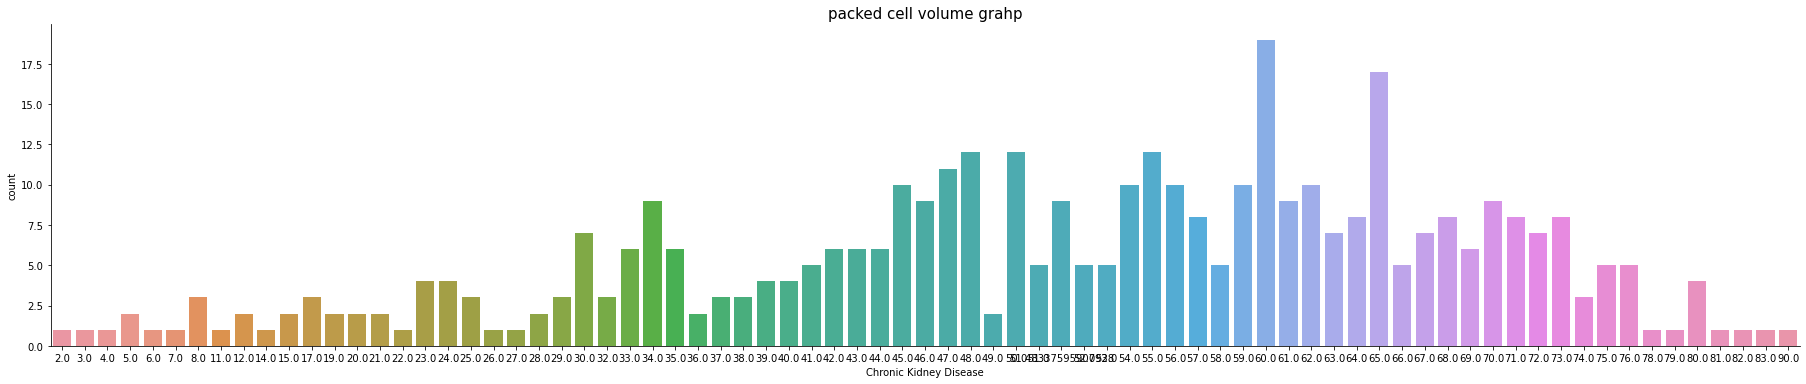

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(data=df, x='age', kind= 'count',aspect=5)
plt.xlabel('Chronic Kidney Disease')
plt.title("packed cell volume grahp",fontsize=15)
plt.show()

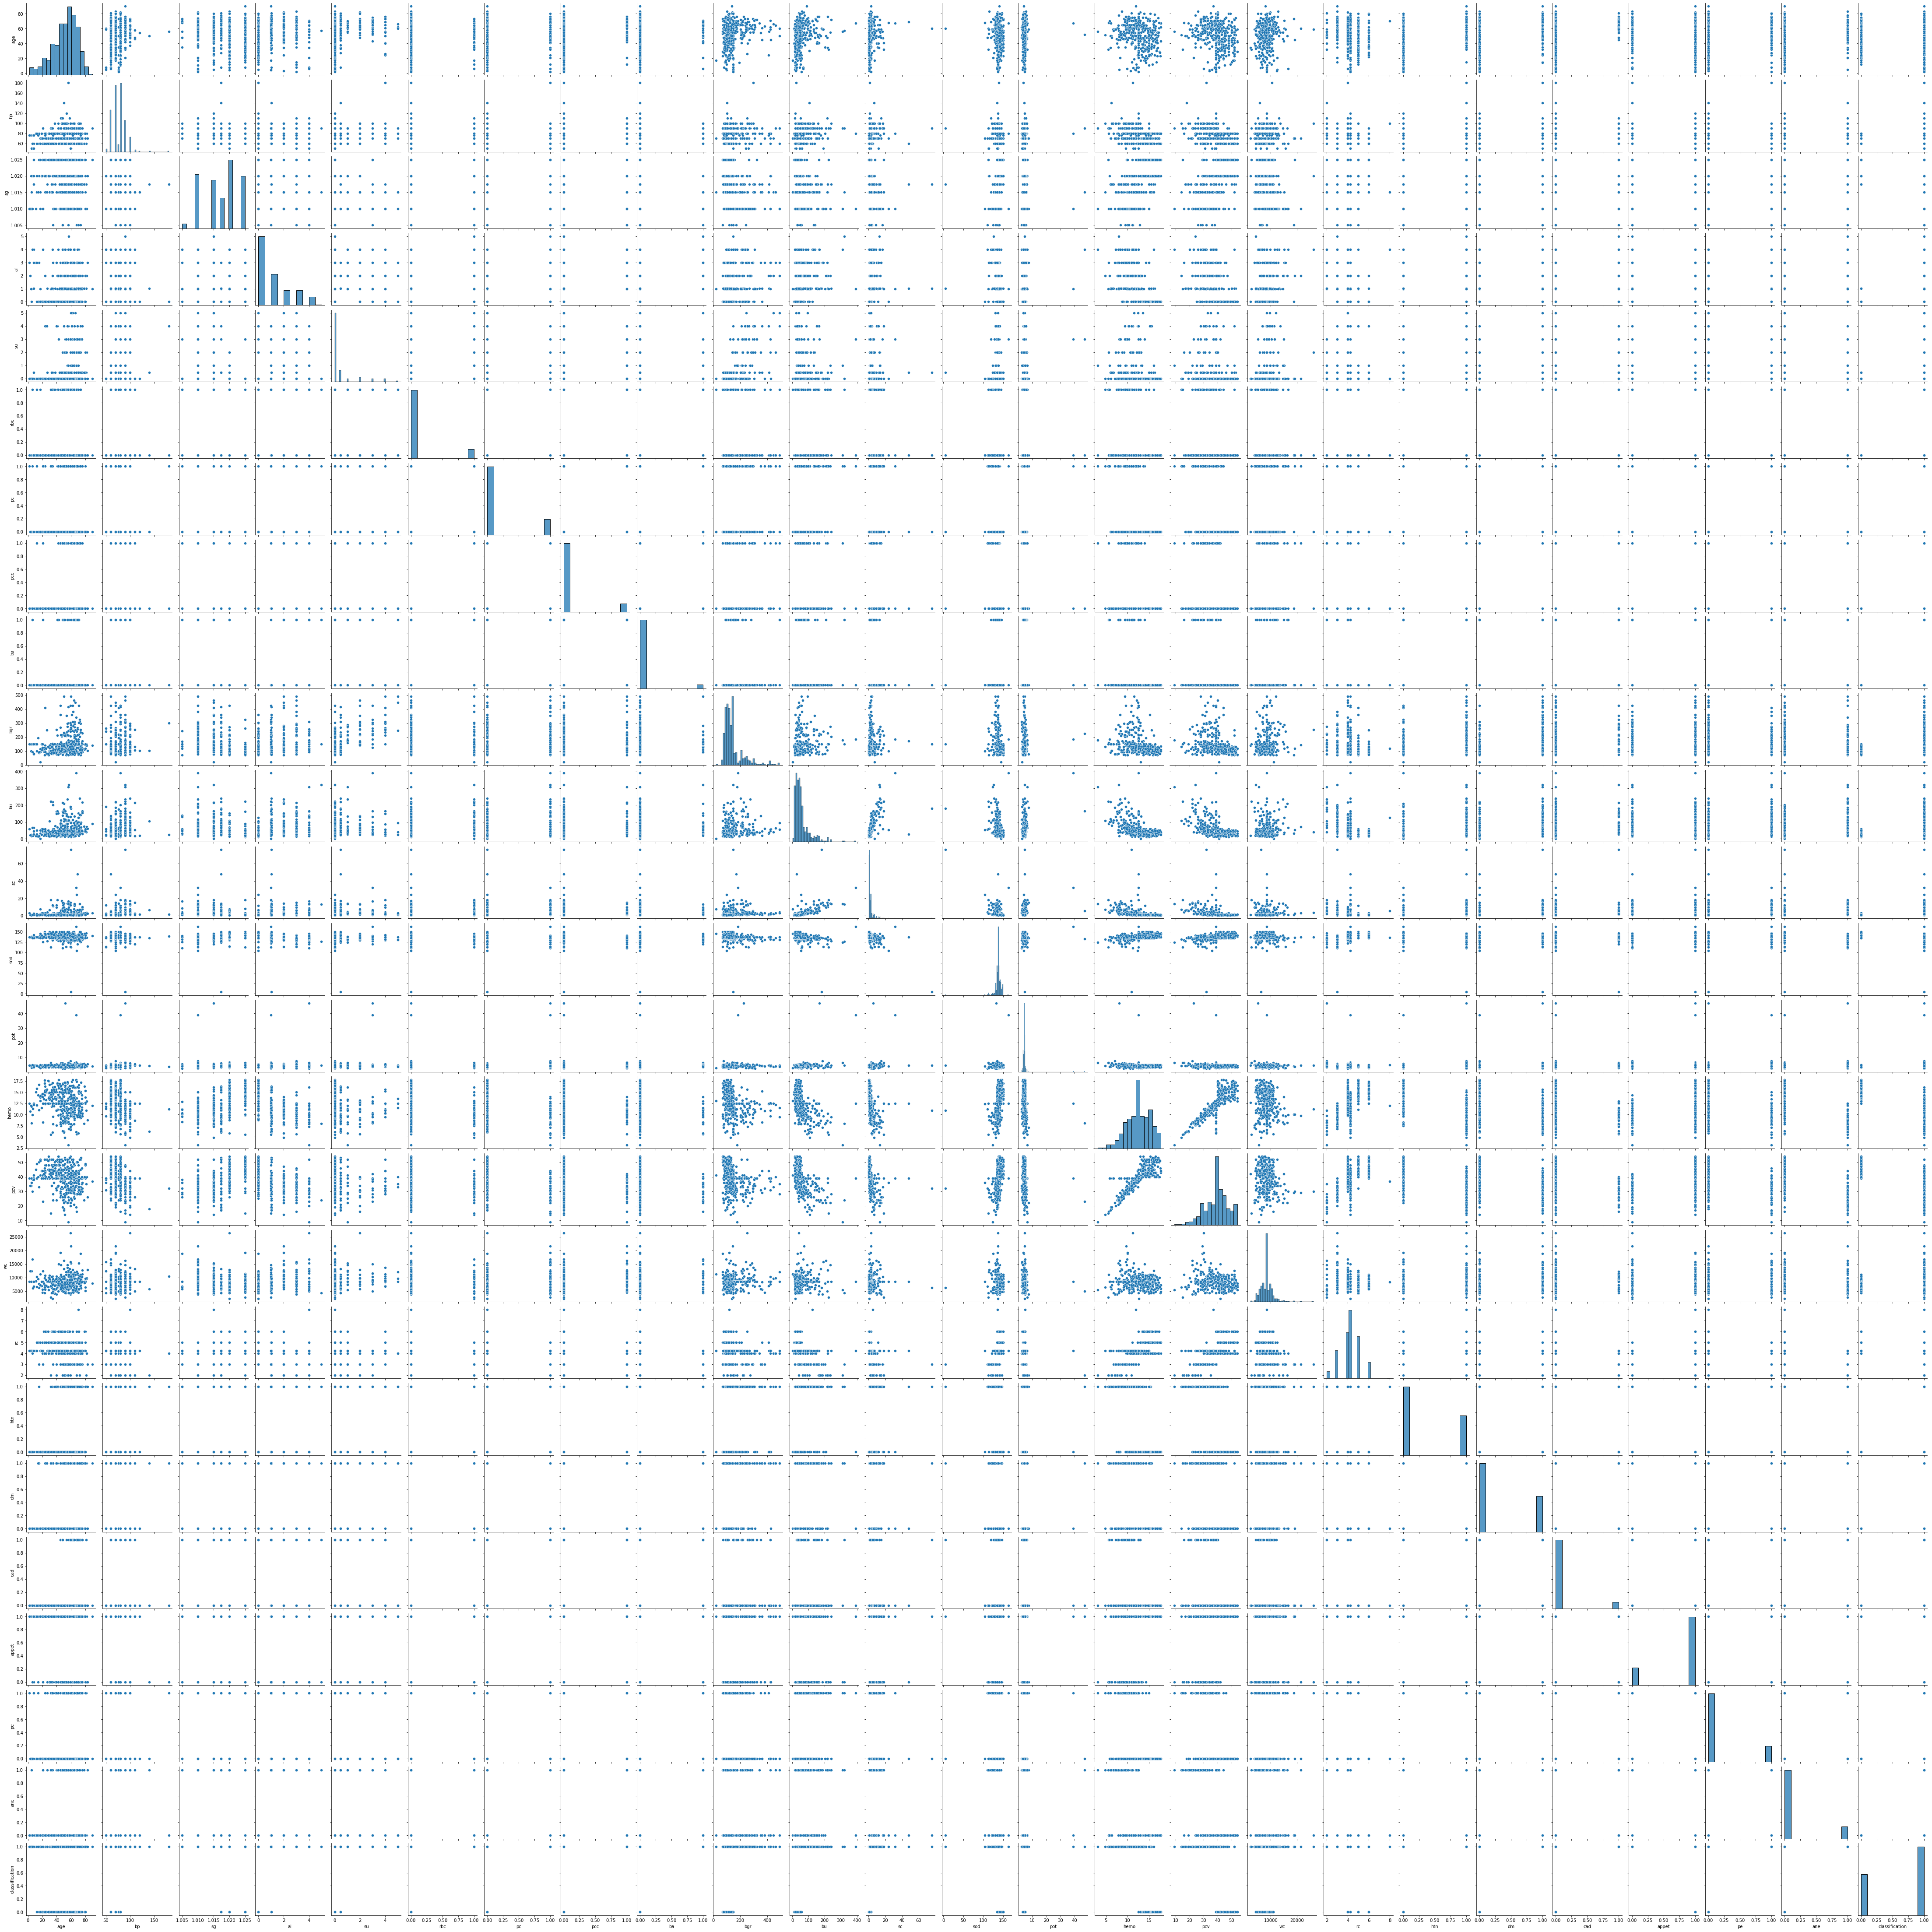

In [21]:
sns.pairplot(df )

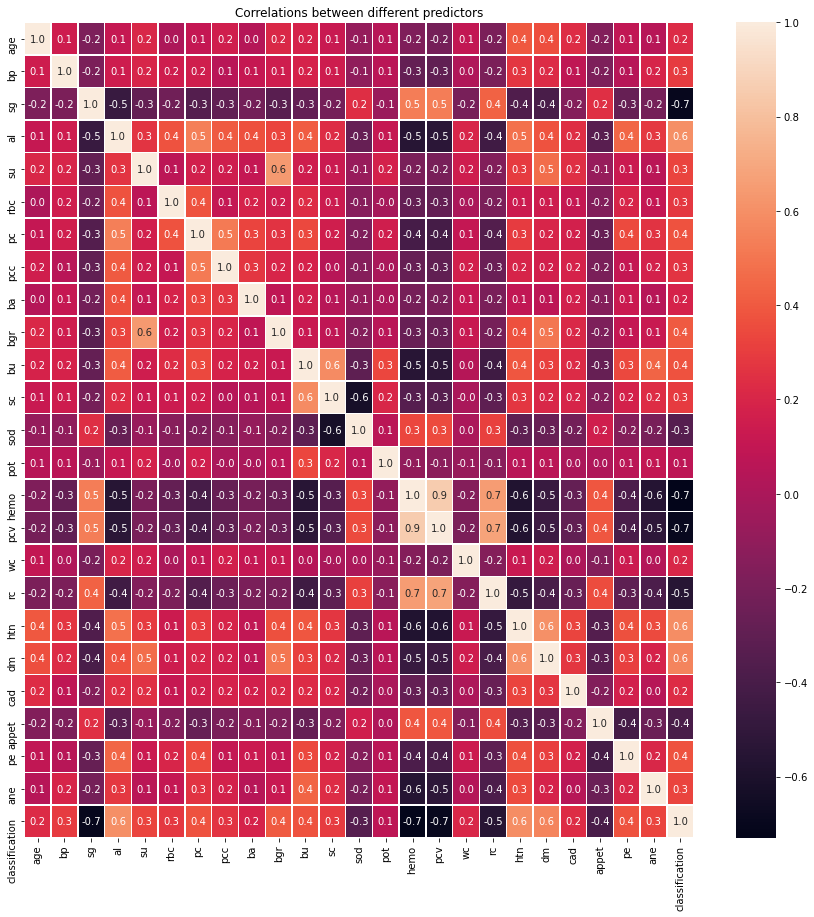

In [22]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

In [23]:
X=df.drop('classification',axis=1)
y=df['classification']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [25]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predict_rfc=rfc.predict(X_test)

In [26]:
print(classification_report(y_test,predict_rfc))
print(confusion_matrix(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        56

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[24  0]
 [ 1 55]]
